In [196]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [197]:
X_train = np.loadtxt("X_train.csv")

In [198]:
X_test = np.loadtxt("X_test.csv")

In [199]:
Y_train = np.loadtxt("Y_train.csv")

In [200]:
Y_test = np.loadtxt("Y_train.csv")

In [ ]:
x = X_train
y =Y_train

In [201]:
x.size

200

In [202]:
x.shape

(100, 2)

In [203]:
y.size

100

In [204]:
y.shape

(100,)

In [166]:
# Define activation function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))

In [167]:
def softmax(self, x):
# Numerically stable with large exponentials
    exps = np.exp(x - x.max())
    return exps / np.sum(exps, axis=0)

In [168]:
x = X_train
x.shape

(100, 2)

In [169]:
y = Y_train
y.shape

(100,)

In [209]:
# Define input
x = X_train
y = Y_train

# Define initial parameters
W1 = np.random.rand(100,1)
b1 = np.random.rand(2,1)
W2 = np.random.rand(100,2)
b2 = np.random.rand(1,1)

print("X", x.shape)
print('\n')
print("Y", y)
print('\n')
print("---------------------")
print('\n')
print("Initial parameters:")
print('\n')
print("W1", W1)
print('\n')
print("b1", b1)
print('\n')
print("---------------------")
print('\n')
print("W2", W2)
print('\n')
print("b2", b2)

X (100, 2)


Y [-4.02284419e+01  1.21199529e+02  1.44961725e+02 -5.36085172e+01
 -8.07826069e+01  7.18636506e+01  7.14660620e+01 -3.33251839e+01
  5.97617006e+01 -1.77106285e+01 -6.57687320e+01  6.26394013e+01
  1.47209922e+02 -1.18027722e+01  4.39625895e+01 -6.28731061e+01
  3.44849629e+01 -5.09420832e+01 -8.49771505e+01  3.68481597e+01
  1.11369597e+02  4.76487061e+01 -9.31874610e-02  1.55078430e+02
 -3.73116259e+01 -4.35690937e+01 -4.22120632e+01  7.20531105e+01
  5.79452597e+01  4.78028835e+01 -1.08456030e+02 -3.73589514e+01
 -7.38892499e+01  1.19229213e+02 -1.05963551e+02  1.07139818e+02
  7.38710742e+01  1.38870886e+02 -1.13688978e+02 -7.25512500e+01
  1.45345079e+02 -1.67025529e+01 -2.41685991e+01 -1.47078117e+02
  1.02947479e+02  1.36847374e+01  1.28475765e+01 -1.32796416e+02
  1.88609830e+00  2.71429981e+01  5.15790201e+00 -9.26084192e+01
  7.13230422e+01  4.78679217e+01  5.42322840e+01  1.29445809e+02
  4.20499295e+01  5.62194631e+01  3.51305435e+01 -4.38039805e+01
  1.995322

In [210]:
W1.shape

(100, 1)

In [213]:
# Fwd Pass
z1 = np.dot(W1.T, x) + b1
a1 = sigmoid(z1)

z2 = np.dot(W2, a1) + b2
a2 = sigmoid(z2)

# Initial output
print("Prediction:", a2, "Actual:", Y_train)

Prediction: [[0.85664513 0.89535138]
 [0.72422647 0.73261873]
 [0.76730768 0.78913092]
 [0.83701257 0.87408435]
 [0.84679279 0.88402299]
 [0.83474507 0.87198296]
 [0.81699352 0.85074845]
 [0.76094936 0.78127469]
 [0.85104155 0.88970632]
 [0.87634475 0.91527605]
 [0.86294301 0.9015593 ]
 [0.82390016 0.86013047]
 [0.87801599 0.91758762]
 [0.85193045 0.89101941]
 [0.86245793 0.90145452]
 [0.74491585 0.75981341]
 [0.84862559 0.88647303]
 [0.82850493 0.86454882]
 [0.78921858 0.81809969]
 [0.72197832 0.7291747 ]
 [0.88932831 0.92796286]
 [0.86666994 0.90610506]
 [0.75966792 0.78024658]
 [0.85027008 0.88804526]
 [0.78189198 0.80850751]
 [0.84250157 0.8809201 ]
 [0.7425233  0.75706698]
 [0.76533863 0.78751103]
 [0.79160842 0.82004862]
 [0.71544012 0.72026061]
 [0.78918395 0.81746938]
 [0.86040155 0.89993455]
 [0.82552011 0.86140501]
 [0.82658697 0.86280242]
 [0.76886906 0.79225378]
 [0.84208122 0.87996686]
 [0.78983988 0.81893588]
 [0.87303085 0.91249183]
 [0.81673367 0.84990777]
 [0.7620359  

In [342]:
def mse_1(Y_train, a2):
    return np.mean(.01*(np.power(Y_train-a2, 2)));
mse(Y_train, a2.T)

5704.833908504914

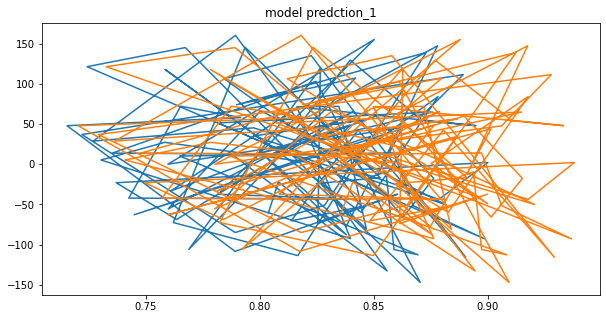

In [323]:
plt.figure(figsize=(10, 5))
plt.plot(a2,Y_train)
plt.title('model predction_1')
plt.show()

In [220]:
# Backward pass

# Compute gradients
dz2 = (a2.T - Y_train)
dW2 = np.dot(dz2.T, a1)
db2 = dz2
dz1 = np.dot(W2.T, dz2.T) * sigmoid(z1) * (1-sigmoid(z1))
dW1 = np.dot(dz1, x.T)
db1 = dz1

# Update weights
W1 = W1 - dW1.T
W2 = W2 - dW2
b1 = b1 - db1
b2 = b2 - db2

In [297]:
# Fwd Pass with new weights
z1New = np.dot(W1.T, x) + b1
a1New = sigmoid(z1New)
z2New = np.dot(W2, a1New) + b2.T
a2New = sigmoid(z2New)
print(" Initial Prediction\n", a2,'\n\n\n\n\n', "New Prediction:\n", a2New,'\n\n\n', " Actual:\n", y)

 Initial Prediction
 [[0.85664513 0.89535138]
 [0.72422647 0.73261873]
 [0.76730768 0.78913092]
 [0.83701257 0.87408435]
 [0.84679279 0.88402299]
 [0.83474507 0.87198296]
 [0.81699352 0.85074845]
 [0.76094936 0.78127469]
 [0.85104155 0.88970632]
 [0.87634475 0.91527605]
 [0.86294301 0.9015593 ]
 [0.82390016 0.86013047]
 [0.87801599 0.91758762]
 [0.85193045 0.89101941]
 [0.86245793 0.90145452]
 [0.74491585 0.75981341]
 [0.84862559 0.88647303]
 [0.82850493 0.86454882]
 [0.78921858 0.81809969]
 [0.72197832 0.7291747 ]
 [0.88932831 0.92796286]
 [0.86666994 0.90610506]
 [0.75966792 0.78024658]
 [0.85027008 0.88804526]
 [0.78189198 0.80850751]
 [0.84250157 0.8809201 ]
 [0.7425233  0.75706698]
 [0.76533863 0.78751103]
 [0.79160842 0.82004862]
 [0.71544012 0.72026061]
 [0.78918395 0.81746938]
 [0.86040155 0.89993455]
 [0.82552011 0.86140501]
 [0.82658697 0.86280242]
 [0.76886906 0.79225378]
 [0.84208122 0.87996686]
 [0.78983988 0.81893588]
 [0.87303085 0.91249183]
 [0.81673367 0.84990777]
 [0.

C:\Users\obaniah\AppData\Local\Temp\ipykernel_11664\523117142.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [324]:
def mse_2(y, a2New):
    return np.mean(np.power(y-a2new, 2));
print(mse_2)

<function mse_2 at 0x0000012A1217C5E0>


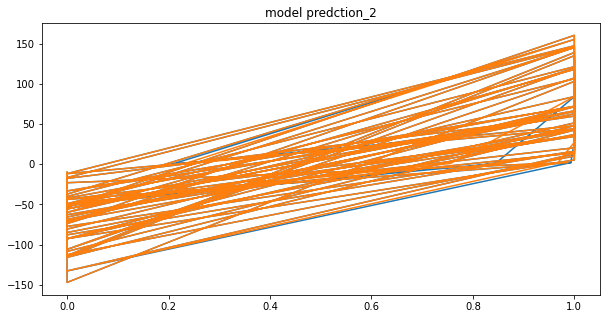

In [325]:
plt.figure(figsize=(10, 5))
plt.plot(a2new,y)
plt.title('model predction_2')
plt.show()

In [311]:
a2new = a2New.astype(float)
y = y.astype(float)

In [351]:
# Backprop
def backprop(W1, W2, b1, b2):
	for i in range(100):
		dz2 = (a2.T - y)
		dW2 = np.dot(dz2.T, a1)
		db2 = dz2
		dz1 = np.dot(W2.T, dz2.T) * sigmoid(z1) * (1-sigmoid(z1))
		dW1 = np.dot(dz1, x.T)
		db1 = dz1
		W1 = W1 - dW1.T
		W2 = W2 - dW2
		b1 = b1 - db1
		b2 = b2 - db2
		z1New = np.dot(W1.T, x) + b1
		a1New = sigmoid(z1New)
		z2New = np.dot(W2, a1New) + b2.T
		a2New = sigmoid(z2New)
		print(a2New, a2)

backprop(W1, W2, b1, b2)

C:\Users\obaniah\AppData\Local\Temp\ipykernel_11664\523117142.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


[[3.71142867e-158 4.50379633e-036]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.00358701e-209 1.12270407e-047]
 [0.00000000e+000 2.74484794e-071]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.53026351e-131 5.60735699e-030]
 [1.00000000e+000 1.00000000e+000]
 [2.28424919e-071 1.56673890e-016]
 [1.46221056e-256 2.91187377e-058]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.24489425e-048 2.22620147e-011]
 [1.00000000e+000 1.00000000e+000]
 [2.23803082e-245 1.26590209e-055]
 [1.00000000e+000 1.00000000e+000]
 [1.87694479e-199 2.36909731e-045]
 [0.00000000e+000 7.11941515e-075]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.71040615e-003 2.91641676e-001]
 [1.00000000e+000 1.00000000e+000]
 [6.41509251e-147 1.83030978e-033]
 [4.88953605e-171 5.81380342e-039]
 [9.17758256e-166 1.12393063e-037]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.

[[0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.65282163e-281]
 [1.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [9.41318153e-085 1.06547932e-019]
 [1.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.

In [355]:
# loss function and its derivative
def mse_final(y, a2new):
    return np.mean(np.power(y-a2new, 2));
def mse_Initial(y, a2):
    return np.mean(np.power(y-a2, 2));
def mse_prime(y, a2new):
    return 2*(a2new-y)/y.size;



In [356]:
mse_Initial(y, a2.T)

5704.833908504914

In [357]:
mse_prime = mse_prime(y, a2new.T)

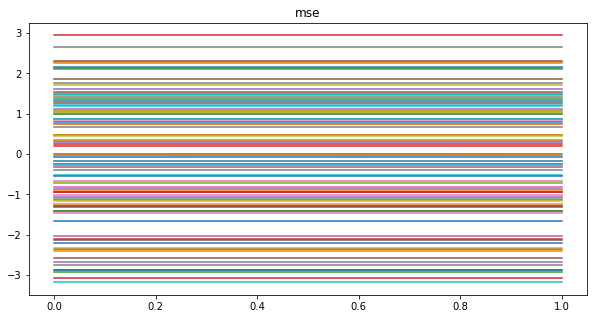

In [358]:
plt.figure(figsize=(10, 5))
plt.plot(mse_prime)
plt.title('mse')
plt.show()

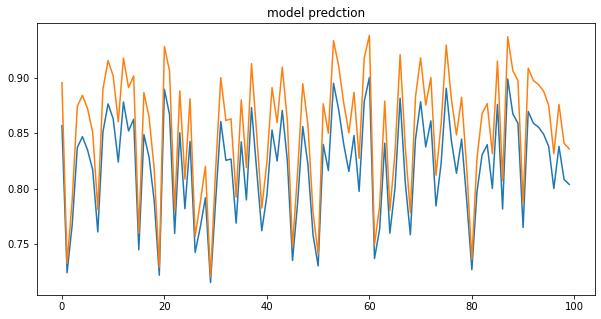

In [359]:
plt.figure(figsize=(10, 5))
plt.plot(a2)
plt.title('model predction')
plt.show()

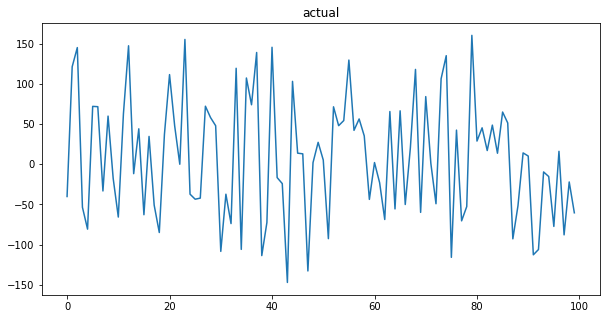

In [360]:
plt.figure(figsize=(10, 5))
plt.plot(y)
plt.title('actual')
plt.show()

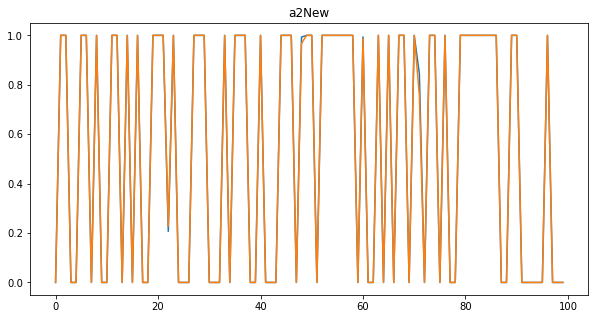

In [361]:
plt.figure(figsize=(10, 5))
plt.plot(a2New)
plt.title('a2New')
plt.show()

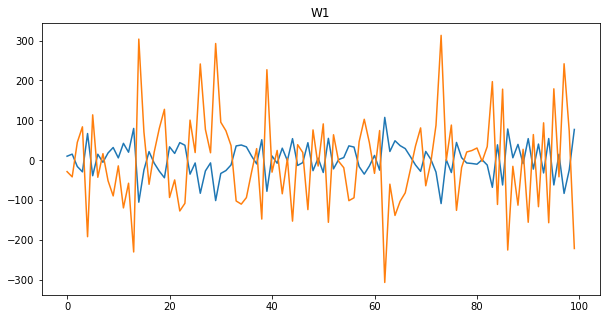

In [362]:
plt.figure(figsize=(10, 5))
plt.plot(W1)
plt.title('W1')
plt.show()

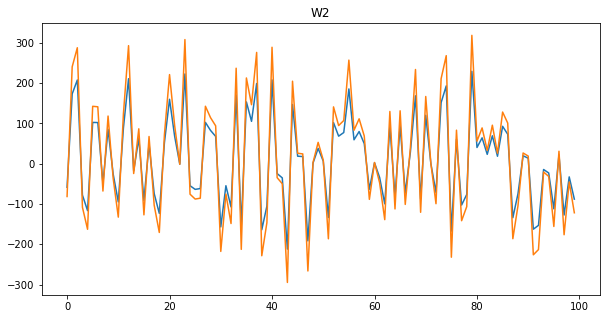

In [363]:
plt.figure(figsize=(10, 5))
plt.plot(W2)
plt.title('W2')
plt.show()

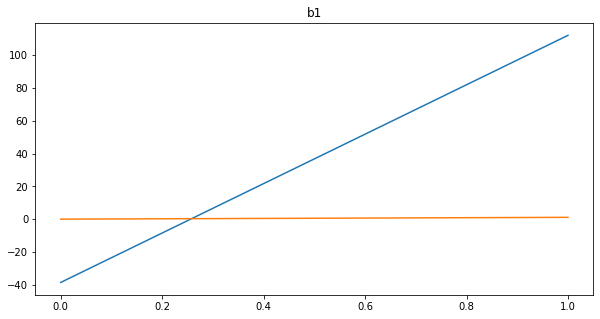

In [364]:
plt.figure(figsize=(10, 5))
plt.plot(b1)
plt.title('b1')
plt.show()

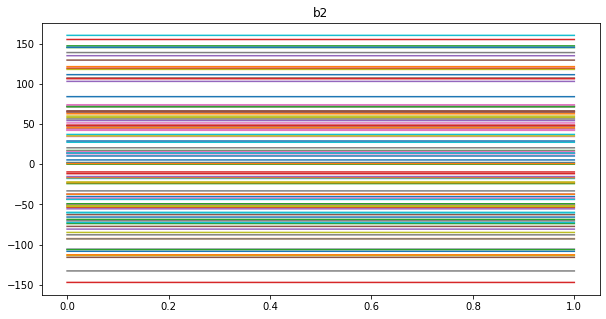

In [365]:
plt.figure(figsize=(10, 5))
plt.plot(b2)
plt.title('b2')
plt.show()

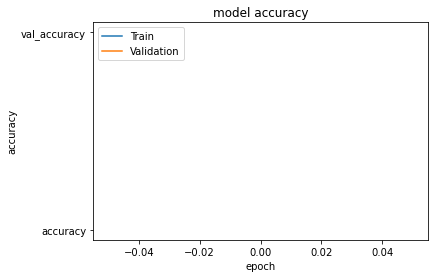

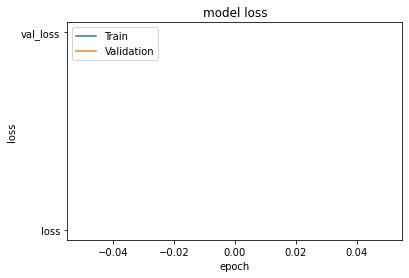

In [366]:
plt.plot(['accuracy'])
plt.plot(['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(['loss'])
plt.plot(['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [367]:
def loss(y, a2):
    """MSE loss function"""
    return np.mean((y - a2)**2)